# 태양광 발전량 예측

## 스테이지 1

### 1. 데이터 읽어오기

In [6]:
import pandas as pd

train = pd.read_csv('data/solar_power/train.csv')
test = pd.read_csv('data/solar_power/test.csv')
submission = pd.read_csv('data/solar_power/sample_submission.csv')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      365 non-null    int64  
 1   DHI     365 non-null    float64
 2   DNI     365 non-null    float64
 3   WS      365 non-null    float64
 4   RH      365 non-null    float64
 5   T       365 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 17.2 KB


### 2. 데이터 확인하기

In [8]:
submission.head(3)

,ID,TARGET
0,1,0
1,2,0
2,3,0


### 3. 데이터프레임을 CSV 파일로 저장하기

In [9]:
submission.to_csv('data/solar_power/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 2

### 1. 데이터 확인하기

In [10]:
# 데이터의 개수, 열 이름, 결측값의 수, 데이터 타입 등을 확인할 수 있습니다. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      730 non-null    int64  
 1   DHI     730 non-null    float64
 2   DNI     730 non-null    float64
 3   WS      730 non-null    float64
 4   RH      730 non-null    float64
 5   T       730 non-null    float64
 6   TARGET  730 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.0 KB


### 2. 데이터 열 확인

In [11]:
# 모든 열을 출력합니다. 
train.columns

Index(['ID', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')

### 3. 데이터 기술통계량 확인

In [12]:
# 평균, 표준편차, 최솟값, 최댓값, 사분위수 값을 얻을 수 있습니다.
train.describe()

,ID,DHI,DNI,WS,RH,T,TARGET
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.353680,0.449832,2.456610,-0.015374,0.005201,17.766240
std,210.877136,0.242069,0.238223,0.894079,1.001358,1.005426,7.852125
min,1.000000,0.000000,0.000810,0.897917,-2.269194,-2.628657,1.958976
25%,183.250000,0.145922,0.279639,1.855208,-0.714420,-0.813083,11.296985
50%,365.500000,0.308450,0.444305,2.276042,-0.064874,-0.053716,17.238159
75%,547.750000,0.535709,0.628943,2.855729,0.721717,0.944528,23.586436
max,730.000000,0.983835,1.000000,7.225000,2.867445,1.790547,36.376067


### 4. 무작위 샘플데이터 확인하기

In [13]:
# sample함수의 기본값은 1입니다.
train.sample(5)

,ID,DHI,DNI,WS,RH,T,TARGET
243,244,0.634240,0.408025,2.039583,-0.255594,1.146519,21.133387
363,364,0.455841,0.448435,2.131250,-0.048948,1.106706,21.985723
12,13,0.503894,0.538486,1.535417,-0.308605,0.057526,23.102036
603,604,0.144012,0.147710,4.220833,0.414444,-0.654418,5.808284
457,458,0.028215,0.692027,1.675000,-1.426150,-0.537322,14.362726


### 5. TARGET 열의 평균값 얻기

In [15]:
# train['열 이름'] 을 사용하면 해당 열만 선택하는 것이 가능합니다.
mean_target = train['TARGET'].mean()
mean_target

17.76623965427808

### 6. 제출 데이터에 TARGET 열의 평균값 할당

In [16]:
submission['TARGET'] = mean_target
submission.head()

,ID,TARGET
0,1,17.76624
1,2,17.76624
2,3,17.76624
3,4,17.76624
4,5,17.76624


### 7. 데이터프레임을 CSV 파일로 저장하기

In [17]:
# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/solar_power/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 3

### 1. 독립변수, 종속변수 설정

In [18]:
# 독립변수
train_x = train.drop(['ID', 'TARGET'], axis = 1)

# 종속변수
train_y = train['TARGET']

### 2. test 데이터의 ID 열 제거

In [19]:
test_x = test.drop('ID', axis = 1)

### 3. 모델 정의

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

### 4. 모델 학습

In [24]:
model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=42)

### 5. 모델 예측값 획득

In [25]:
pred = model.predict(test_x)

### 6. 제출 파일에 값 할당 및 저장

In [26]:
submission['TARGET'] = pred

# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/solar_power/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 4

### 1. 데이터 읽어오기

In [27]:
import pandas as pd

train = pd.read_csv('data/solar_power/train.csv')
test = pd.read_csv('data/solar_power/test.csv')
submission = pd.read_csv('data/solar_power/sample_submission.csv')

### 2. 데이터 확인하기

In [28]:
train.head()

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963


### 3. 시각화 모듈 import

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

### 4. 히스토그램을 활용한 데이터 분포 확인

아래 그래프를 통해 데이터 분포가 0~40 사이의 값이고, 평균 등장 빈도가 약 20회이며, 등장 빈도 수가 매우 적은 데이터는 없는 것처럼 보인다.

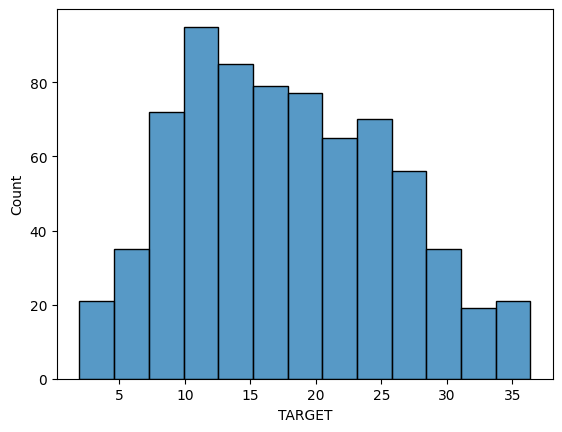

In [30]:
sns.histplot(x = train['TARGET'])
plt.show()

세로 방향으로 데이터를 표현하면, 매개변수를 x로 입력했을 때보다 등장 빈도 차이가 더 커 보인다. 실제 데이터가 변한 것은 아니지만, 축을 바꿈으로써 차이를 더욱 직관적으로 확인 가능하다

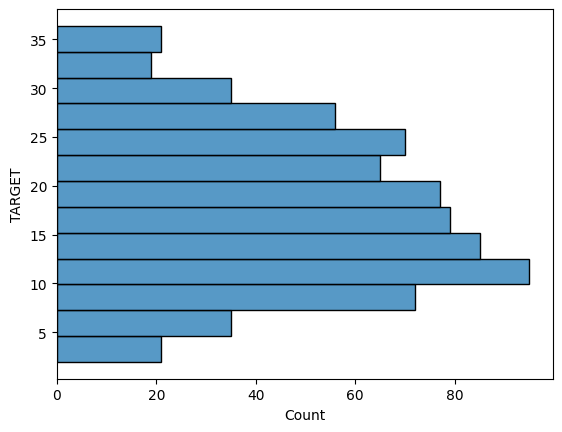

In [33]:
ax = sns.histplot(y = train['TARGET'])
plt.show()

### 5. 히스토그램을 활용한 온도(T) 분포 확인

온도의 평균이 0인 것을 보았을 때 데이터의 범위를 조정하기 위해 스케일링이 적용되었다는 것을 예상할 수 있다. 또한 -2 전후의 구간이 다른 구간에 비해 등장 빈도가 매우 적다. 따라서 직관적으로 T열의 값 일부가 이상치로 판별할 수 있다.

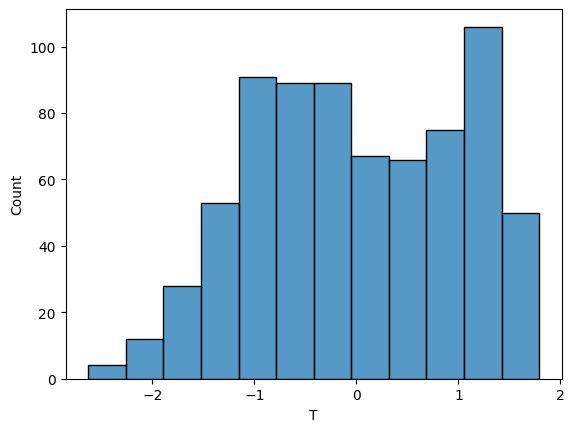

In [34]:
axis_x = train['T']
sns.histplot(x = axis_x)
plt.show()

### 6. 회귀선이 포함된 산점도 그리기

회귀선이 포함된 산점도를 그렸을 때, 각 데이터들이 회귀선 근처에 밀집되어 있지 않고 퍼져있다. 이를 통해 WS열과 TARGET 열에는 상관관계가 거의 없는 것을 확인할 수 있고, TARGET 열과 상관관계를 가지는 다른 열을 찾기 위해 다시 시각화를 해보자

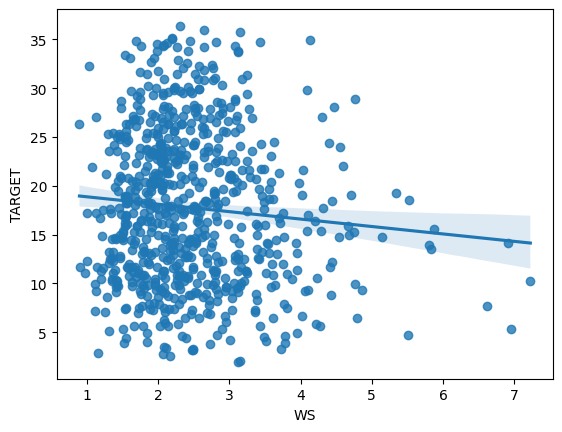

In [35]:
sns.regplot(x = train['WS'], y = train['TARGET'])
plt.show()

아래의 출력 결과 산점도가 회귀선 근처에 어느 정도 밀집되어 있는 것을 볼 수 있다. 즉, RH 열의 값이 증가할 때 TARGET 열의 값이 감소하는 경향을 보이고 있기에, 두 변수는 **음의 상관관계가 있다.** 라고 할 수 있다.

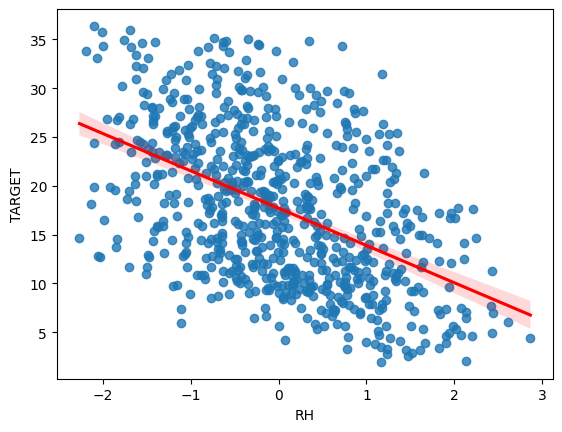

In [36]:
ax = sns.regplot(x = train['RH'], y = train['TARGET'], line_kws = {'color' : 'red'})
plt.show()

### 7. 독립변수, 종속변수 설정

In [38]:
train_x = train.drop(['TARGET'], axis = 1)
train_y = train['TARGET']

# ID 열 제거
train_x = train_x.drop('ID', axis = 1)
test_x = test.drop('ID', axis = 1) 

### 8. 모델 정의 및 학습

In [39]:
# DecisionTreeRegressor 모듈을 불러오는 코드입니다.
from sklearn.tree import DecisionTreeRegressor

# 불러온 모듈을 model 변수에 할당합니다.
model = DecisionTreeRegressor(random_state = 42)

# 학습을 진행합니다.
model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=42)

### 9. 모델 예측값 획득

In [40]:
pred = model.predict(test_x)

### 10. 제출 파일에 값 할당 및 CSV 파일로 저장

In [41]:
submission['TARGET'] = pred

# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/solar_power/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 5

### 1. 데이터 읽어오기

In [42]:
import pandas as pd

train = pd.read_csv('data/solar_power/train.csv')
test = pd.read_csv('data/solar_power/test.csv')
submission = pd.read_csv('data/solar_power/sample_submission.csv')

### 2. 특성 간 상관 관계 확인

아래의 코드 실행 결과 각 열에 대한 상관 행렬이 반환되었고, 특히 TARGET 열과의 상관관계가 높은 열을 확인할 수 있다.

In [43]:
train.corr()

,ID,DHI,DNI,WS,RH,T,TARGET
ID,1.000000,0.050718,0.018302,-0.048168,-0.014074,0.043845,0.051372
DHI,0.050718,1.000000,-0.337424,-0.121559,0.139689,0.489096,0.346327
DNI,0.018302,-0.337424,1.000000,-0.012349,-0.619980,0.298397,0.726132
WS,-0.048168,-0.121559,-0.012349,1.000000,0.015007,-0.169799,-0.086688
RH,-0.014074,0.139689,-0.619980,0.015007,1.000000,-0.423290,-0.486821
T,0.043845,0.489096,0.298397,-0.169799,-0.423290,1.000000,0.689052
TARGET,0.051372,0.346327,0.726132,-0.086688,-0.486821,0.689052,1.000000


아래의 코드 실행 결과 TARGET 열과의 상관관계가 존재하는 열은 **DHI, DNI, T, RH** 4개이다.

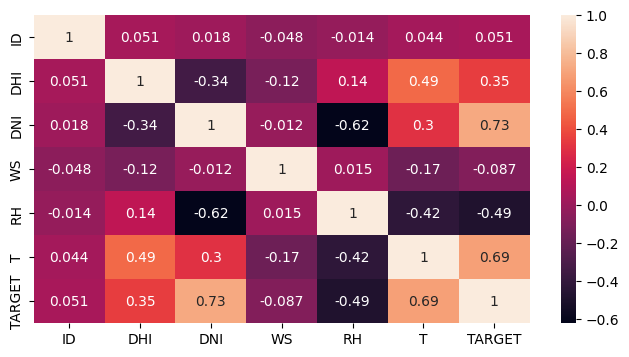

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이번 셀에서 출력할 이미지 크기를 지정합니다. 
plt.figure(figsize = (8,4))

# annot을 False로 설정하면 각 셀의 수치가 표기되지 않습니다.
ax = sns.heatmap(train.corr(), annot = True)
plt.show()

### 3. 독립변수, 종속변수 설정 및 열 제거

In [45]:
# 독립변수, 종속변수로 분리
train_x = train.drop(['TARGET'], axis = 1)
train_y = train['TARGET']

# ID 특성 제거
train_x = train_x.drop('ID', axis = 1)
test_x = test.drop('ID', axis = 1) 

### 4. 검증 데이터 만들기

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)

### 5. 모델 정의 및 학습

In [47]:
# RandomForestRegressor 모듈을 불러오는 코드입니다.
from sklearn.ensemble import RandomForestRegressor

# 불러온 모듈을 model 변수에 할당합니다.
model = RandomForestRegressor(random_state = 42)

# 학습을 진행합니다.
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### 6. 피처의 중요도 확인

feature_importances_는 각 피처의 중요도를 나타내는 값으로 값이 클수록 모델의 예측에 큰 영향을 미친다는 것을 의미한다. 중요도 값은 0에서 1 사이의 범위에 있으며, 전체 피처의 중요도 값의 합은 1이다.

In [48]:
importances = model.feature_importances_
names = model.feature_names_in_

print(importances)
print(names)

[0.14263791 0.41747398 0.00590269 0.00641273 0.42757269]
['DHI' 'DNI' 'WS' 'RH' 'T']


### 7. 특성 중요도 시각화

각 피처의 중요도를 시각화해보자

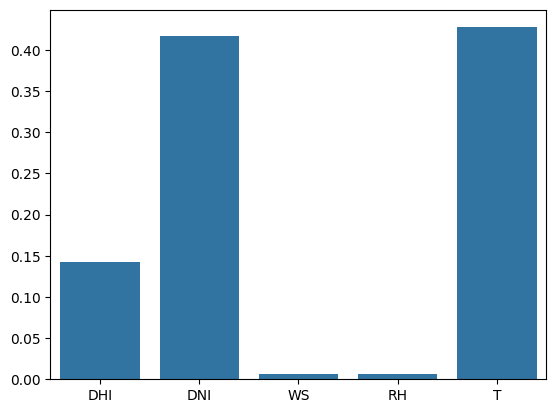

In [51]:
ax = sns.barplot(x = names , y = importances)
plt.show()

### 8. 검증 점수 확인

In [52]:
val_predict = model.predict(x_valid)

squared = True: 평균 제곱 오차를 계산할 때 제곱 오차를 사용할지 여부를 나타내는 매개변수이다.

In [53]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid, val_predict, squared = True)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.9853186311667101

### 9. 모델 예측값 획득

In [54]:
predict = model.predict(test_x)

### 10. 제출 파일에 값 할당 및 csv 파일 저장

In [55]:
submission['TARGET'] = predict

# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/solar_power/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 6

### 1. 데이터 읽어오기

In [86]:
import pandas as pd

train = pd.read_csv('data/solar_power/train.csv')
test = pd.read_csv('data/solar_power/test.csv')
submission = pd.read_csv('data/solar_power/sample_submission.csv')

### 2. 특성 간 상관관계 확인

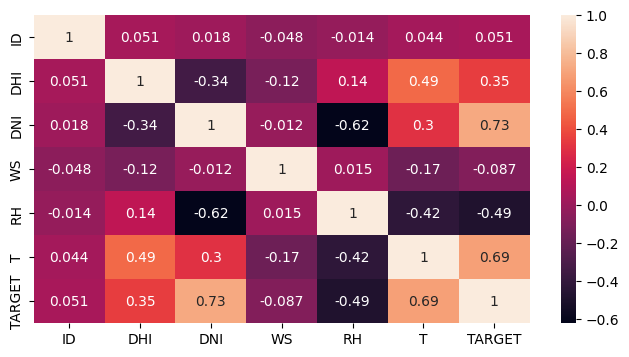

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이번 셀에서 출력할 이미지 크기를 지정합니다. 
plt.figure(figsize = (8,4))

# annot을 False로 설정하면 각 셀의 수치가 표기되지 않습니다.
sns.heatmap(train.corr(), annot = True)
plt.show()

### 3. 특성 공학

In [88]:
train['sunlight'] = train['DHI'] + train['DNI']
test['sunlight'] = test['DHI'] + test['DNI']

### 4. 독립변수, 종속변수 설정 및 열 제거

In [89]:
# 독립변수, 종속변수로 분리
train_x = train.drop(['TARGET'], axis = 1)
train_y = train['TARGET']

# ID 특성 제거
train_x = train_x.drop('ID', axis = 1)
test_x = test.drop('ID', axis = 1) 

### 5. 검증 데이터 만들기

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=42)

### 6. 의사 결정 나무 모델

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

decision = DecisionTreeRegressor(random_state=42)
decision.fit(x_train, y_train)

decision_valid = decision.predict(x_valid)

mean_squared_error(y_valid, decision_valid, squared=True)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.046787365011482

### 7. 랜덤 포레스트 모델

In [92]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 42)
forest.fit(x_train, y_train)

forest_valid = forest.predict(x_valid)

mean_squared_error(y_valid, forest_valid, squared = True)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.3192123480746836

### 8. XGBoost 모델

XGBoost는 부스팅 알고리즘 중 하나로, 약한 학습기들을 결합하여 강력한 앙상블 모델을 만드는 기법이다. Gradient Boosting 알고리즘을 기반으로 하며, 이전 트리의 오차를 보완하는 방식으로 새로운 트리를 학습시킨다.

In [93]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train, y_train)

xgb_valid = xgb.predict(x_valid)

mean_squared_error(y_valid, xgb_valid, squared = True)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.681083652319253

### 9. 하이퍼 파라미터 설정

랜덤 포레스트 모델의 하이퍼 파라미터를 설정하여 성능을 향상시켜보자

* n_estimators는 앙상블에 사용할 트리의 개수이다. 여기는 150개의 트리를 사용하도록 설정하였다. 트리의 개수가 많을수록 모델의 복잡도가 증가하며, 예측 성능이 향상될 수 있지만 너무 많으면 학습 및 예측 시간이 오래 걸린다.
* max_depth는 트리의 최대 깊이를 제한한다. 여기는 12로 설정되었다. 트리의 깊이가 깊을수록 모델의 복잡도가 증가하며, 과적합의 위험이 있다.
* min_samples_split는 노드를 분할하기 위해 필요한 최소 샘플 개수이다. 샘플 개수가 적은 노드는 더이상 분할이 되지 않는데, 이를 통해 모델의 과적합을 방지할 수 있다.

In [94]:
# 하이퍼파라미터는 모델 정의부분에서 조정합니다. 
forest_hyper = RandomForestRegressor(n_estimators = 150, max_depth = 12, min_samples_split = 2, random_state = 42)

forest_hyper.fit(x_train, y_train)

forest_hyper_valid = forest_hyper.predict(x_valid)

mean_squared_error(y_valid, forest_hyper_valid, squared = True)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.3104242710408287

### 10. 모델 직접 만들기

In [95]:
# 모델 정의
my_model = RandomForestRegressor(n_estimators = 150, max_depth = 12, min_samples_split = 2, random_state = 42)

# 모델 학습
my_model.fit(x_train, y_train)

# x_valid 데이터에 대한 모델의 예측값 얻기
my_model_valid = my_model.predict(x_valid)

# 모델 검증 점수 얻기
mean_squared_error(y_valid, my_model_valid, squared = True)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.3104242710408287

In [96]:
my_prediction = my_model.predict(test_x)

### 11. 제출 파일에 값 할당 및 csv 파일 저장

In [98]:
submission['TARGET'] = my_prediction

# 매개변수는 수정하지 말아주세요.
submission.to_csv('data/solar_power/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')